# Source Extent Analysis

Determining the number and size of sources in the Simulations has a great impact on source anaylsis success. Here I will present a data-driven approach using the Brainnetome functional Atlas.

Paper:          https://academic.oup.com/cercor/article/26/8/3508/2429104#86181040  
Website:        http://atlas.brainnetome.org/  
Atlas Download: https://pan.cstcloud.cn/s/H9wCmuJSFI  
README:         https://pan.cstcloud.cn/web/share.html?hash=0NrZTk3XSDY

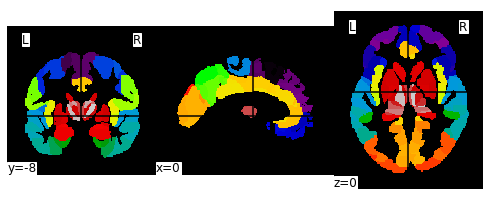

In [3]:
import nilearn as ni
import numpy as np
nii_fname = r'C:\Users\lukas\Dokumente\projects\esinet\evaluate\BNA_MPM_thr25_1.25mm.nii.gz'
img = ni.image.load_img(nii_fname)
ni.plotting.plot_img(nii_fname, cmap='nipy_spectral')

In [43]:
data = img.get_fdata()
region_ids = list(set(data.flatten().astype(int)))
voxel_size = 1.25  # mm
vol_per_region = np.array([np.where(data==reg_id)[0].size*voxel_size for reg_id in region_ids])
diam_per_region = np.power((6*vol_per_region) / np.pi, 1/3)

print(f'Min: {np.min(diam_per_region)} mm\nmmean: {np.mean(diam_per_region)} mm\nMax: {np.max(diam_per_region[1:])} mm\n')
m, sd = [np.mean(diam_per_region[1:]), np.std(diam_per_region[1:])]
print(f'The extent could be sampled from a gaussian distribution with mean of {m:.1f} and standard deviation of {sd:.1f}')


Min: 9.391759334281012 mm
mmean: 17.871231623255873 mm
Max: 24.84886539508293 mm

The extent could be sampled from a gaussian distribution with mean of 17.2 and standard deviation of 3.2


In [44]:
fun = lambda: ((np.random.randn(1) / sd) + m)[0]
# del sd, m
fun()

16.929633034720574

In [40]:
((np.random.randn(10000000) / sd) + m).std()

0.31123463454961464

In [50]:
callable(fun)

True